#CL-II (IR)

In [ ]:
#1. Write a program for pre-processing of a text document such as stop word removal, stemming.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
# Download the missing resource
nltk.download('punkt_tab')

# Sample document
text = "This is a sample document. It contains some words that need preprocessing."

# Tokenization
tokens = word_tokenize(text.lower())
print("Original Tokens:", tokens)

# Stop word removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("After Stop Word Removal:", filtered_tokens)

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("After Stemming:", stemmed_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original Tokens: ['this', 'is', 'a', 'sample', 'document', '.', 'it', 'contains', 'some', 'words', 'that', 'need', 'preprocessing', '.']
After Stop Word Removal: ['sample', 'document', '.', 'contains', 'words', 'need', 'preprocessing', '.']
After Stemming: ['sampl', 'document', '.', 'contain', 'word', 'need', 'preprocess', '.']


In [ ]:
#2. Implement a program for retrieval of documents using inverted files.

from collections import defaultdict
import re

# Sample documents
documents = {
    1: "The quick brown fox jumps over the lazy dog",
    2: "A brown fox is fast and clever",
    3: "The dog is lazy but friendly"
}

# Create inverted index
inverted_index = defaultdict(list)

for doc_id, text in documents.items():
    words = re.findall(r'\w+', text.lower())
    for word in set(words):
        inverted_index[word].append(doc_id)

print("Inverted Index:")
for word, doc_ids in sorted(inverted_index.items()):
    print(f"{word}: {doc_ids}")

# Query function
def search(query):
    query_words = re.findall(r'\w+', query.lower())
    result = set(documents.keys())
    for word in query_words:
        if word in inverted_index:
            result &= set(inverted_index[word])
    return result

# Test query
query = "brown fox"
print(f"\nDocuments containing '{query}':", search(query))

Inverted Index:
a: [2]
and: [2]
brown: [1, 2]
but: [3]
clever: [2]
dog: [1, 3]
fast: [2]
fox: [1, 2]
friendly: [3]
is: [2, 3]
jumps: [1]
lazy: [1, 3]
over: [1]
quick: [1]
the: [1, 3]

Documents containing 'brown fox': {1, 2}


In [ ]:
#4. Implement e-mail spam filtering using text classification algorithm with appropriate dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (replace with actual spam dataset)
data = {
    'text': ['Win free money now', 'Meeting at 3pm tomorrow',
             'Claim your prize', 'Project update needed',
             'Free lottery winner', 'Schedule for next week'],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42
)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Test with new email
new_email = ["Free offer click now"]
new_vec = vectorizer.transform(new_email)
print("\nPrediction for new email:", classifier.predict(new_vec)[0])

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00         1
        spam       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Prediction for new email: spam


Data points:
 [[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 8  8]
 [ 9 10]
 [10  9]]


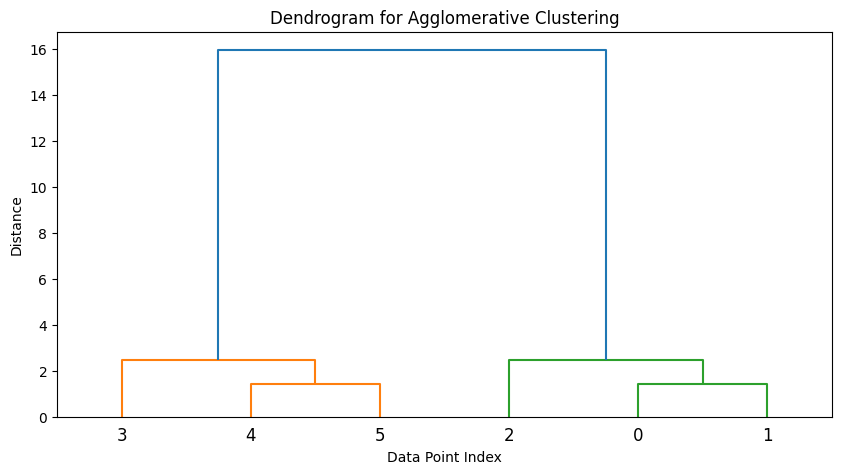


Cluster Labels: [0 0 0 1 1 1]


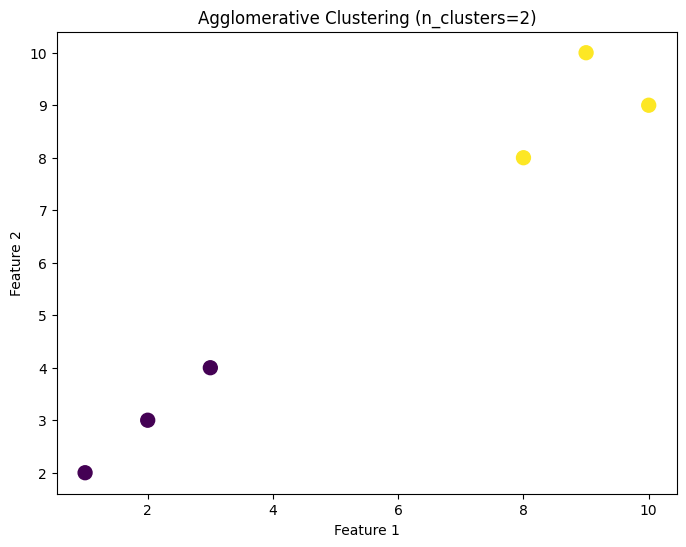

In [ ]:
#5. Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Sample dataset
data = np.array([[1, 2], [2, 3], [3, 4], [8, 8], [9, 10], [10, 9]])
print("Data points:\n", data)

# Compute linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

# Perform clustering
n_clusters = 2
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = cluster.fit_predict(data)

print("\nCluster Labels:", labels)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100)
plt.title(f"Agglomerative Clustering (n_clusters={n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#6. Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).

import numpy as np

# Sample web graph (adjacency matrix)
# Page i links to page j if graph[i][j] = 1
graph = np.array([
    [0, 1, 1, 0],
    [0, 0, 1, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0]
])

n = len(graph)
damping_factor = 0.85
iterations = 20

# Initialize PageRank values
pagerank = np.ones(n) / n
print(f"Initial PageRank: {pagerank}")

# Calculate outgoing links for each page
outgoing_links = np.sum(graph, axis=1)

for iteration in range(iterations):
    new_pagerank = np.zeros(n)

    for i in range(n):
        # Sum contributions from all pages linking to page i
        for j in range(n):
            if graph[j][i] == 1:
                if outgoing_links[j] > 0:
                    new_pagerank[i] += pagerank[j] / outgoing_links[j]

        # Apply PageRank formula with damping factor
        new_pagerank[i] = (1 - damping_factor) / n + damping_factor * new_pagerank[i]

    pagerank = new_pagerank
    print(f"Iteration {iteration + 1}: {pagerank}")

print(f"\nFinal PageRank: {pagerank}")
print(f"Most important page: Page {np.argmax(pagerank)}")

Initial PageRank: [0.25 0.25 0.25 0.25]
Iteration 1: [0.14375 0.14375 0.4625  0.25   ]
Iteration 2: [0.2340625  0.09859375 0.3721875  0.29515625]
Iteration 3: [0.19567969 0.13697656 0.42976172 0.23758203]
Iteration 4: [0.22014873 0.12066387 0.38082363 0.27836377]
Iteration 5: [0.19935004 0.13106321 0.41895456 0.25063219]
Iteration 6: [0.21555569 0.12222377 0.39096299 0.27125755]
Iteration 7: [0.20365927 0.12911117 0.41162519 0.25560437]
Iteration 8: [0.2124407  0.12405519 0.39619115 0.26731295]
Iteration 9: [0.20588124 0.1277873  0.40772676 0.2586047 ]
Iteration 10: [0.21078387 0.12499953 0.39912312 0.26509348]
Iteration 11: [0.20712733 0.12708315 0.4055374  0.26025213]
Iteration 12: [0.2098534  0.12552911 0.40075376 0.26386373]
Iteration 13: [0.20782035 0.12668769 0.40432174 0.26117022]
Iteration 14: [0.20933674 0.12582365 0.4016606  0.26317901]
Iteration 15: [0.20820576 0.12646811 0.40364532 0.26168081]
Iteration 16: [0.20904926 0.12598745 0.40216508 0.26279821]
Iteration 17: [0.2084

#CL-II (BIF)

In [ ]:
#1. DNA Sequence Analysis. Task: Analyze a given DNA sequence and perform basic sequence manipulation, including finding motifs, calculating GC content, and identifying coding regions. Deliverable: A report summarizing the analysis results and any insights gained from the sequence.

# Input DNA sequence
dna = "ATGCGTACGTAGCTAGCGTAGGCTAAATGCGCGC"

# Find motifs
def find_motif(seq, motif):
    pos = []
    for i in range(len(seq) - len(motif) + 1):
        if seq[i:i+len(motif)] == motif:
            pos.append(i)
    return pos

motif = "ATG"
print("Motif positions:", find_motif(dna, motif))

# Calculate GC Content
gc_count = dna.count('G') + dna.count('C')
gc_content = (gc_count / len(dna)) * 100
print("GC Content:", gc_content)

# Identify coding regions (simplified: sequence between 'ATG' and 'TAA')
start = dna.find('ATG')
stop = dna.find('TAA', start)
if start != -1 and stop != -1:
    coding_region = dna[start:stop+3]
    print("Coding Region:", coding_region)
else:
    print("No coding region found.")

Motif positions: [0, 26]
GC Content: 55.88235294117647
Coding Region: ATGCGTACGTAGCTAGCGTAGGCTAA


In [ ]:
#2. RNA-Seq Data Analysis. Task: Analyze a provided RNA-Seq dataset and perform differential gene expression analysis. Deliverable: A detailed report presenting the differentially expressed genes, their functional annotations, and any potential biological interpretations.



In [ ]:
#4. Assignment: Molecular Docking and Virtual Screening. Task: Perform molecular docking simulations to predict the binding affinity between a protein target and a small molecule ligand. Additionally, conduct virtual screening to identify potential drug candidates. Deliverable: A report summarizing the docking results, including the binding poses and potential lead compounds.

In [ ]:
#5. Assignment: Machine Learning for Genomic Data. Task: Apply machine learning algorithms, such as random forests or support vector machines, to classify genomic data based on specific features or markers. Deliverable: A comprehensive analysis report presenting the classification results, model performance evaluation, and insights into the predictive features.
